
# Yield of DCO mergers per metallicity


Goal of This notebook is to plot the yield of (mostly BBH mergers) as a function of the metallicity


$$ \frac{R_{event}}{d \ln Z} =  \frac{\sum_{z_i}^{z_{i +1}} N_{event} }{ \int_{0}^{i} w_{AIS_i} } \cdot  \frac{1}{<M_{pop}> } [M_{\odot}^{-1}], $$ 

here $ N_{event}$ counts the number of events that we have found (like merging BBH) between metallicity $Z_i$ and $Z_{i+1}$,  $<M_{pop}>$ is the average amout of star-forming mass needed to produce this simulation (and $w_{AIS_i}$ is the adaptive imporance sampling weight for this bin, normalised over all systems, 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
import seaborn as sns

import os
import h5py as h5
from astropy.table import vstack, Table, Column
import astropy.units as u
from astropy import constants as const
from scipy.stats import norm as NormDist

# Chosen cosmology 
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import z_at_value

import sys
# Import functions
import importlib
import SupportFunctions as func
importlib.reload(func)

######################################
## locations
save_loc    =  '../Figures/'
proj_dir    = '/n/holystore01/LABS/hernquist_lab/Users/lvanson/CompasOutput/'
data_dir    = proj_dir+ '/v02.26.03/N1e7Grid_BBH_BHNS_optimized/'


######################################
## PLOT setttings
plt.rc('font', family='serif')
from matplotlib import rc
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
fsize, SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE = 30,25,25,30
for obj in ['axes','xtick','ytick']:
    plt.rc(obj, labelsize=MEDIUM_SIZE)          # controls default text sizes
for obj in ['figure','axes']:
    plt.rc(obj, titlesize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize


######################################
## Widescreen jupyter notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))



## Collect data from all variations

Replace 'data_location' with the actual data path. 
Download data from Zenodo here: https://zenodo.org/record/7080725, and here: https://zenodo.org/record/7080164


In [8]:
################################################################################################
data_location = '/n/holystore01/LABS/hernquist_lab/Users/lvanson/CompasOutput/v02.26.03/N1e7Grid_BBH_BHNS_optimized/' 
################################################################################################


# Location to save the HDF5 file
output_file = "../Output/Yield_data.h5"

# List of simulations
simulations = os.listdir(data_location)
simulations = [sim for sim in simulations if sim not in ['EssentialData', 'Grid_Call_Stroopwafel.py']]

# Open the HDF5 file in write mode
with h5.File(output_file, "r+") as h5file:    
    for s, sim in enumerate(simulations):
        print(sim)
        
        # Check if a group exists
        if sim in h5file:
            print('already in data, continue')
            continue

        # Get the data for this simulation
        events_per_Zbin = func.get_numbers(data_dir=data_location, simname=sim)

        # store the data in an hdf file
        events_per_Zbin.write(output_file, path=sim, append = True)
        


faccFIXEDbeta0.5zetaHG6.0RemMassFRYER2022fmix0.5SNDELAYED
already in data, continue
faccFIXEDbeta0.5zetaHG6.0RemMassFRYER2022fmix1.4SNDELAYED
already in data, continue
faccTHERMALzetaHG6.5RemMassFRYER2012SNDELAYED
already in data, continue
faccFIXEDbeta0.25zetaHG6.0RemMassFRYER2012SNDELAYED
already in data, continue
faccFIXEDbeta0.5gammaMIXTUREfcircum0.0zetaHG6.0RemMassFRYER2012SNDELAYED
already in data, continue
faccFIXEDbeta0.5zetaHG4.5RemMassFRYER2012SNDELAYED
already in data, continue
faccFIXEDbeta0.5zetaHG6.0RemMassFRYER2022fmix1.0SNDELAYED
already in data, continue
faccFIXEDbeta0.5zetaHG6.0RemMassFRYER2022fmix4.0SNDELAYED
already in data, continue
faccFIXEDbeta0.75zetaHG6.0RemMassFRYER2012SNDELAYED
already in data, continue
faccFIXEDbeta0.5zetaHG5.5RemMassFRYER2012SNDELAYED
already in data, continue
faccFIXEDbeta0.5fcore1.1zetaHG6.0RemMassFRYER2012SNDELAYED
already in data, continue
faccFIXEDbeta0.5zetaHG5.0RemMassFRYER2012SNDELAYED
already in data, continue
faccFIXEDbeta0.0zetaH

# Plot the yields per Msun of star formation at some metallicity
## also showing an analytical estimate


$$ \frac{R_{event}}{d \ln Z} =  \frac{\sum_{z_i}^{z_{i +1}} N_{event} }{ \int_{0}^{i} w_{AIS_i} } \cdot  \frac{1}{<M_{pop}> } $$


$w_{AIS_i}$ is the adaptive imporance sampling weight for this bin, normalised over all systems, 


/n/home04/lvanson/.conda/envs/jupyter_3.6/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in log


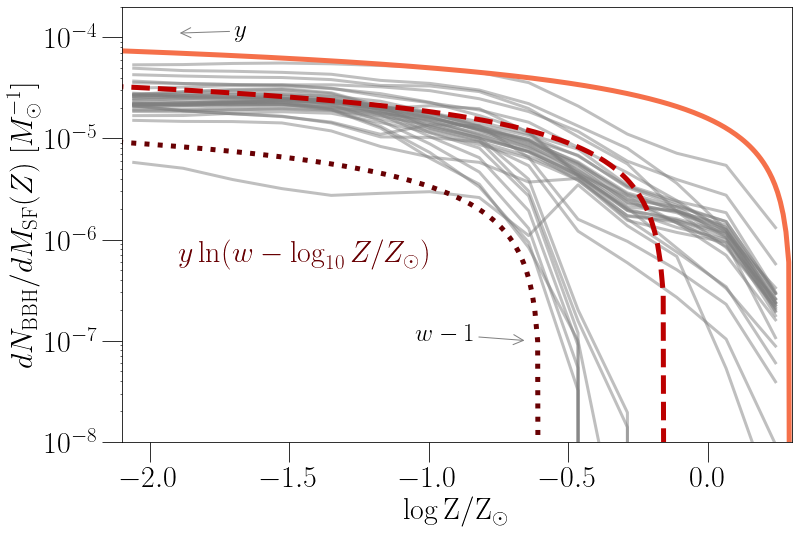

In [9]:
# ['merging_BBH', 'merging_NSBH', 'merging_NSNS', 'Stellar_mergers', 'CE_Event_Counter', 'EjectedCE']
KEY = 'merging_BBH'
Zsun = 0.014 

####################
fig, ax = plt.subplots(figsize = (12,8))

# For every list of variations
for s, sim in enumerate(simulations):

    try:
        events_per_Zbin = Table.read(output_file,  path=sim)

        yield_event = events_per_Zbin[KEY] /events_per_Zbin['Average_SF_mass_needed']  * (1./events_per_Zbin['mixture_weight_sum']) 

        ax.plot(np.log10((10**events_per_Zbin['Metallicity_bin'])/Zsun), yield_event,
                 lw = 3, alpha = 0.5, c = 'grey', label = None,  zorder = 1)
    except:
        continue


#####################
# Analytical estimates
logZ = np.arange(-3, 0.5, step = 0.01)
log_colors = ['#680003','#BC0000','#F5704A'] #Red
linestyles = [':', '--', '-']
y_vals = [1e-5, 3e-5, 6e-5]
w_vals = [0.4, 0.85, 1.3]
for i, (y, w) in enumerate(zip(y_vals, w_vals)):
    F = y * np.log(w - logZ)
    plt.plot(logZ, F, lw = 5, color = log_colors[i], ls = linestyles[i])

plt.text(-1.9, 6e-7,'$y \ln (w-\log_{10} Z/Z_{\odot})$', size =30, color = log_colors[0])
ax.annotate('$y$', xytext=(-1.7, 1e-4), xy=(-1.9, 1.1*1e-4),  arrowprops={"arrowstyle":"->", "color":"gray"})
ax.annotate('$w-1$', xytext=(-1.05, 1e-7), xy=(-0.65, 1e-7),  arrowprops={"arrowstyle":"->", "color":"gray"})

########
ax.tick_params(axis='both', which='major', labelsize=20, size=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.locator_params(axis='y', nbins=6)

plt.xlabel('$\mathrm{\log Z/Z_{\odot}}$', fontsize = 30)
plt.ylabel('$dN_{\mathrm{BBH} }/dM_{\mathrm{SF}}(Z)$ $[M^{-1}_{\odot}]$', fontsize = 30)

plt.xlim(-2.1, 0.3)
plt.ylim(1e-8, 2*1e-4)
plt.yscale('log')
plt.savefig(save_loc + '/'+KEY+'Yield_AllGrey.pdf', bbox_inches='tight')
plt.show()

